In [1]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
import glob

In [2]:
from ezc3d import c3d
import numpy as np

def read_labels(data_path):
    c3d_to_compare= c3d(data_path)
    event = c3d_to_compare['parameters']['EVENT']['LABELS']['value']
    time = np.around(c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1]*1000)
    
    return [event, time]

# Obliczenie włączenia i wyłączenia mięśnia

In [3]:
data_path=r"Z:\baza\2020-08-05-B0444-S01-E01-T01-K01.c3d"
#data_path=r"C:\Users\gmultimedia.PJATK15\Desktop\pjatk_M_K\2020-08-06-B0446-S01-E01-T01.c3d"
muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pyomeca import Analogs

import dataprocesing as dp

freq=1000
muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
def onset_offset_muscles(data_path):
 
    #emgs= dp.normalize_emg(analogs)
    
    emg=Analogs.from_c3d(data_path, usecols=muscles)
    emg=dp.normalize_emg(emg)
    
    emg.plot(x="time", col="channel", col_wrap=3)
    
    plt.show()
    emg = dp.emg_full_preproces(data_path)
    #emg[9].plot()
    #plt.show()
    
    for i in range(16):
        
        #emg[i].plot(x="time", col="channel", col_wrap=3)
        
        onsets =  emg[i].meca.detect_onset(   #.sel(channel=["Voltage.1"]
        threshold= emg[i].mean(),   # mean of the signal 
        #threshold= emg[i].std(),
        n_above=freq / 4,                     # we want at least 1/2 second above the threshold
        n_below=freq / 4,                     # we accept point below threshold for 1/2 second
        )  
        emg_std=emg[i].std()          # odchylenie standardowe
        emg_mean=emg[i].mean()        # średnia
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=4, 
                        top=1, 
                        wspace=0.25, 
                        hspace=0.35)
        
        for (start, end) in onsets:
            plt.axvline(x=start/1000, color="g") #dzielimy przez 1000 (tyle odczytujemy klatek na sec), aby była ta sama skala (przejście z klatek na sekundy)
            plt.axvline(x=end/1000, color="r")
            emg[i].plot()
            #emg_std.plot()
            
        #print(emg_std.values[0])
        #print(emg_std)
        #print(emg_mean)
        #print(emg_std-emg_mean)
        
        #print(threshold)    
    
        plt.title("Aktywacja pracy mięśnia - "+muscles_names[i])
        plt.xlabel("time[s]")
        plt.ylabel("analogs")
        plt.show()
    
                        


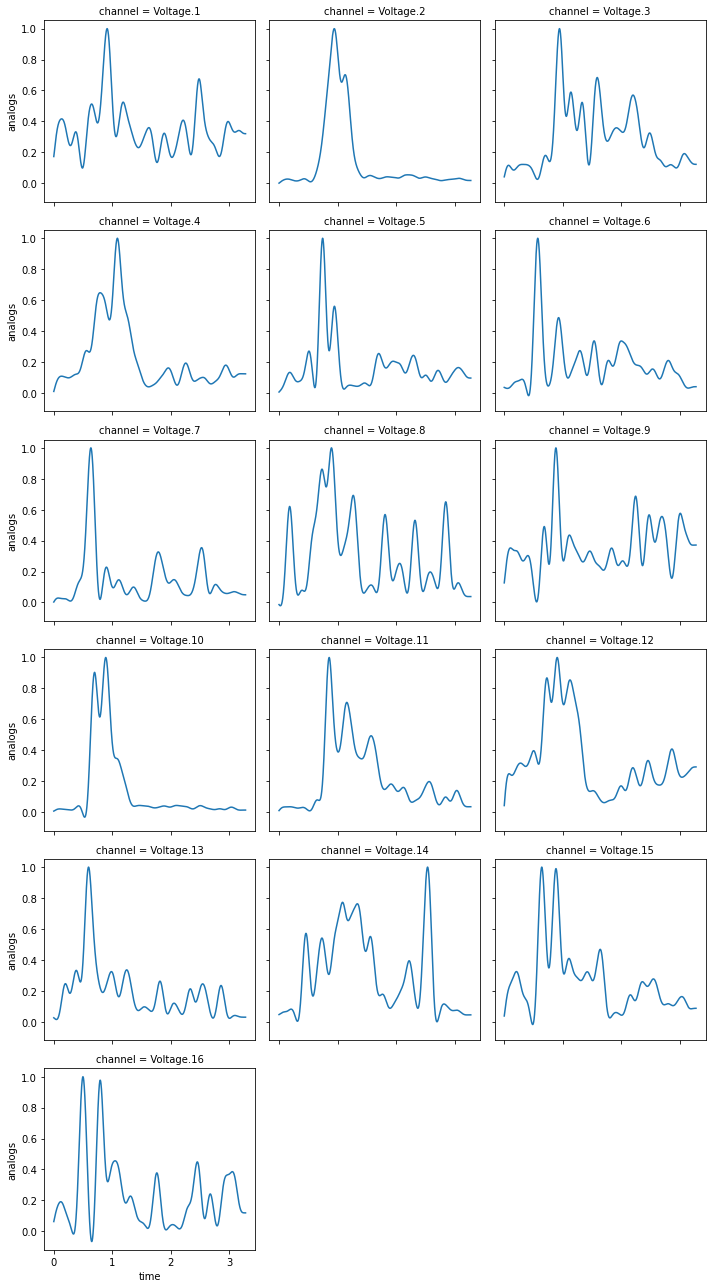

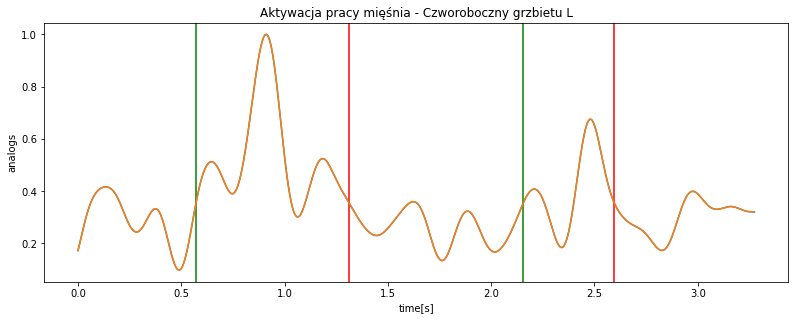

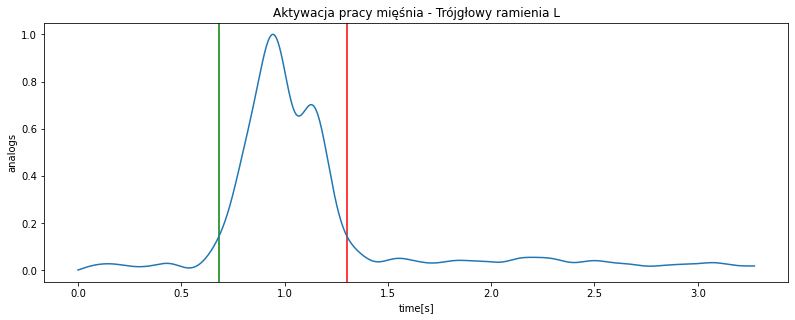

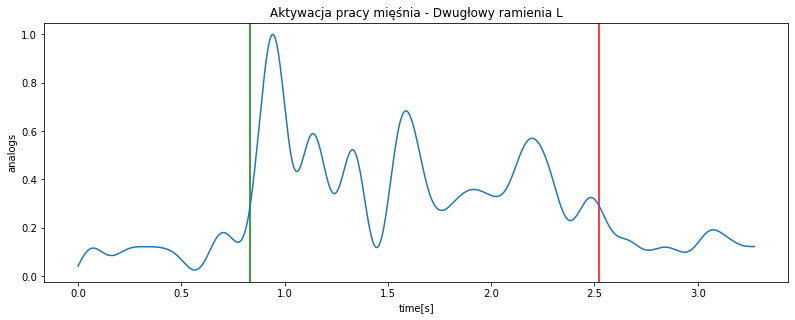

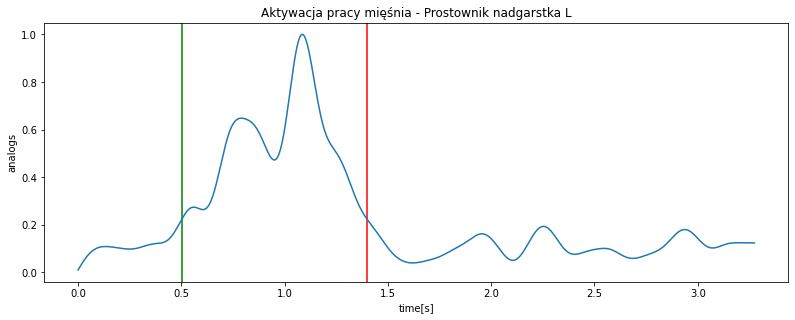

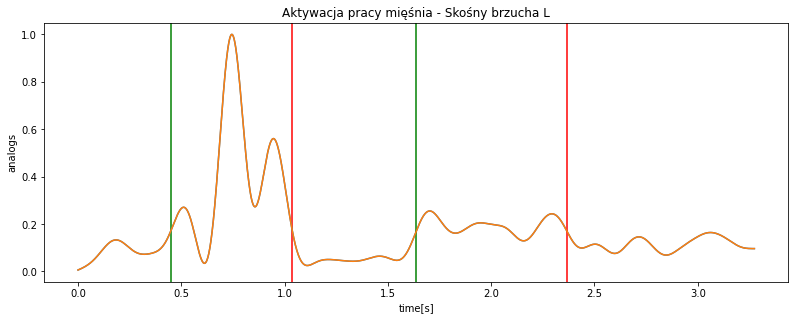

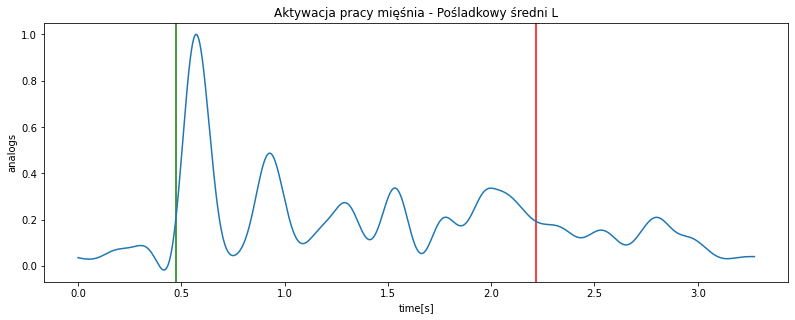

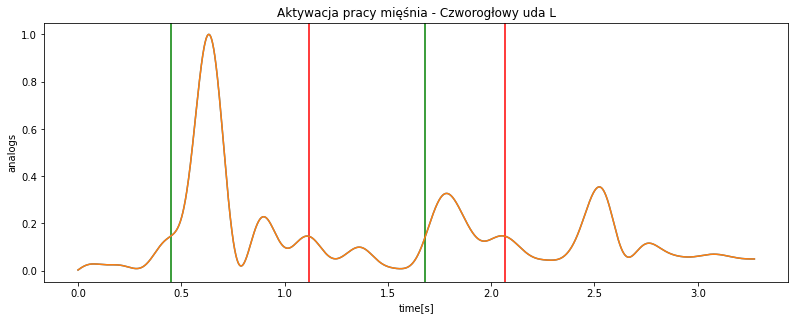

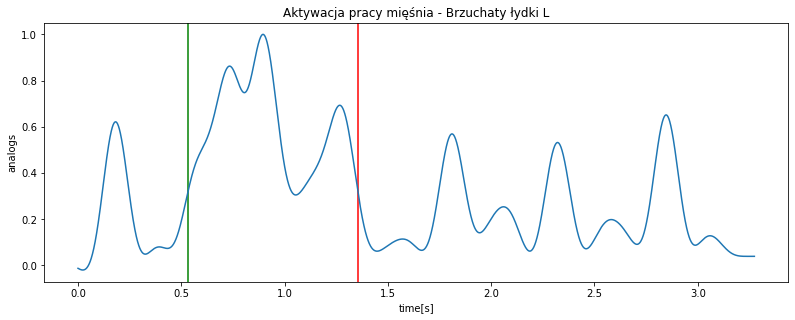

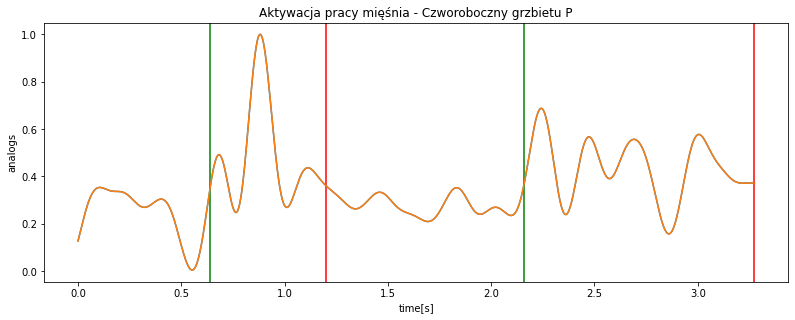

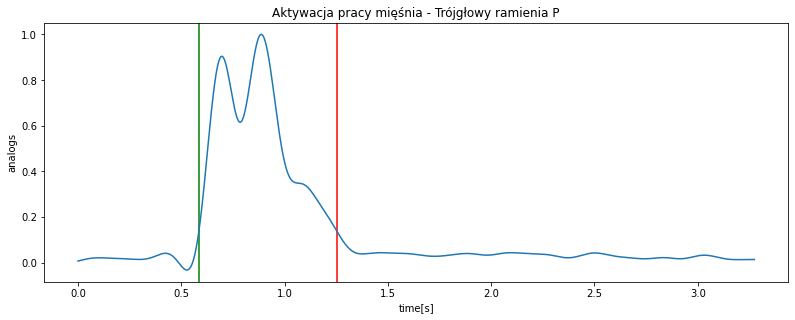

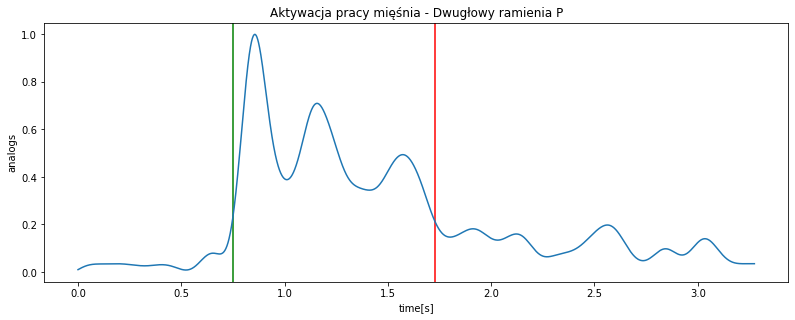

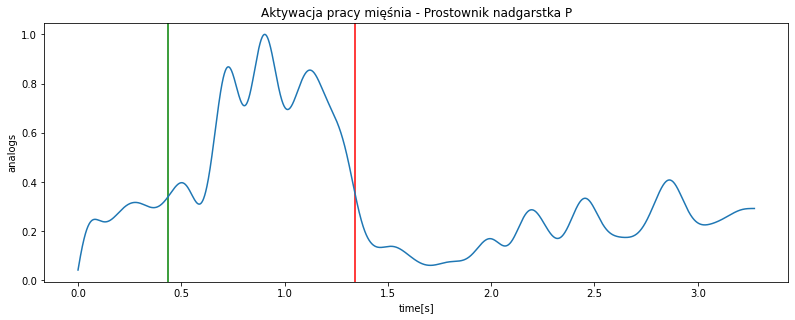

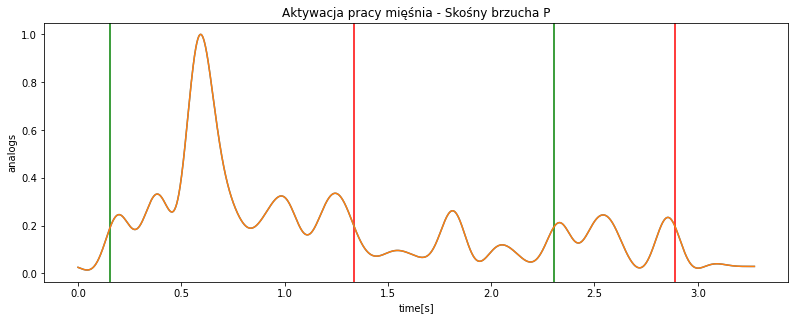

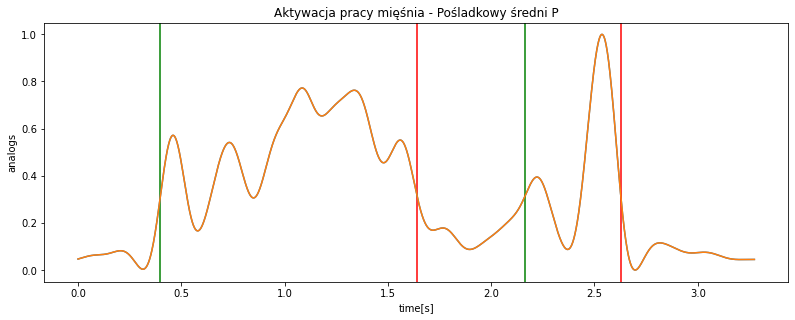

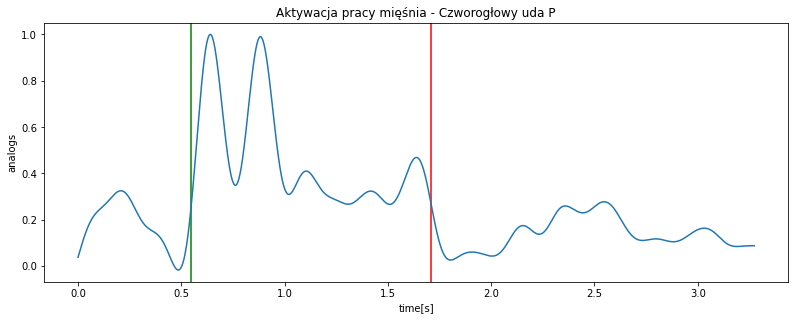

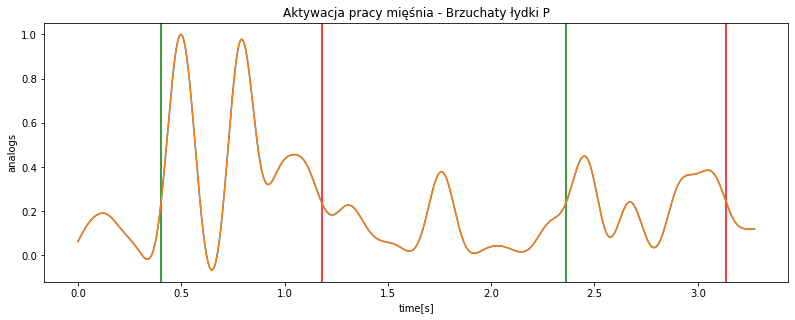

In [5]:
onset_offset_muscles(data_path)

#  Określenie ocinków i podfaz

In [6]:
data_path=r"Z:\baza\2020-08-06-B0445-S01-E02-T01-K02.c3d"
#data_path=r"C:\Users\gmultimedia.PJATK15\Desktop\pjatk_M_K\2020-08-06-B0446-S01-E01-T01.c3d"
muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pyomeca import Analogs

import dataprocesing as dp

freq=1000
muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
def onset_offset_muscles(data_path):
 
    #emgs= dp.normalize_emg(analogs)
    
    emg=Analogs.from_c3d(data_path, usecols=muscles)
    emg=dp.normalize_emg(emg)
    
    #emg.plot(x="time", col="channel", col_wrap=3)
    
    #plt.show()
    
    emg = dp.emg_full_preproces(data_path)
    
    #emg=emg.meca.time_normalize(n_frames=1000)
    #emg[9].plot()
    #plt.show()
    
    for i in range(16):
        
        #emg[i].plot(x="time", col="channel", col_wrap=3)
        
        onsets =  emg[i].meca.detect_onset(   #.sel(channel=["Voltage.1"]
        threshold= emg[i].mean(),   # mean of the signal 
        
        #threshold2= emg[i].std(),
            
        n_above=freq / 4,                     # we want at least 1/2 second above the threshold
        n_below=freq / 4,                     # we accept point below threshold for 1/2 second
        )  
        emg_std=emg[i].std()          # odchylenie standardowe
        emg_mean=emg[i].mean()        # średnia
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=5, 
                        top=0.25, 
                        wspace=0.25, 
                        hspace=0.35)
        
        for (start, end) in onsets:
            
            #plt.axvline(x=start/1000, color="g") #dzielimy przez 1000 (tyle odczytujemy klatek na sec), aby była ta sama skala (przejście z klatek na sekundy)
            #plt.axvline(x=end/1000, color="r")
            plt.axvspan(start/1000, end/1000, color="b")
            
            emg[i].plot(color="r")
            
            #emg_std.plot()
            
        #print(emg_std.values[0])
        #print(emg_std)
        #print(emg_mean)
        #print(emg_std-emg_mean)
        
        #print(threshold)    
    
        plt.title("Aktywacja pracy mięśnia - "+muscles_names[i])
        plt.xlabel("time[s]")
        plt.ylabel("analogs")
        plt.show()
    

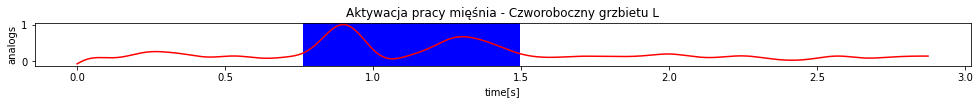

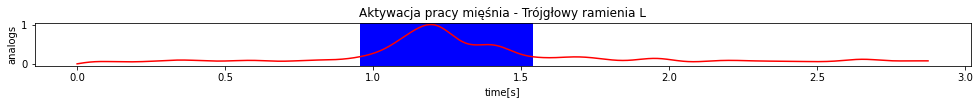

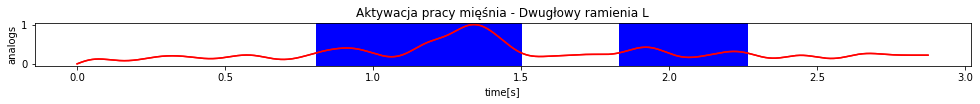

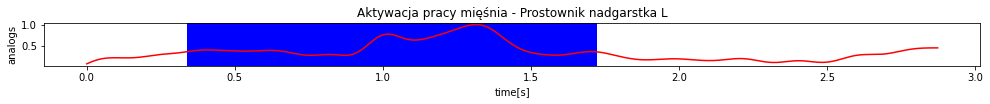

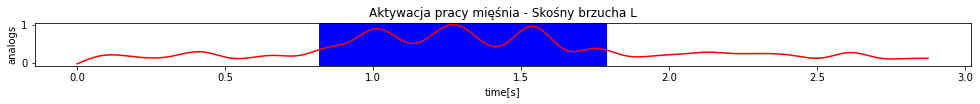

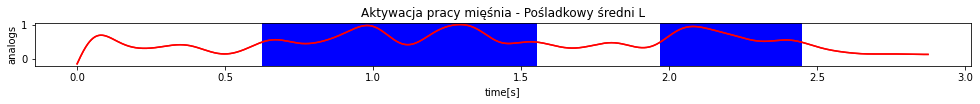

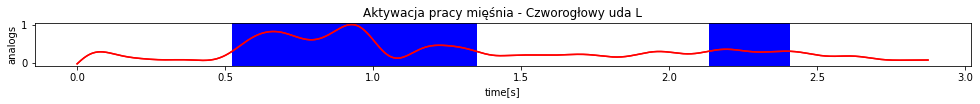

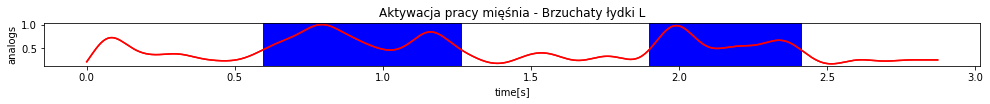

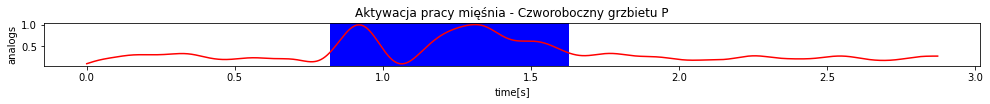

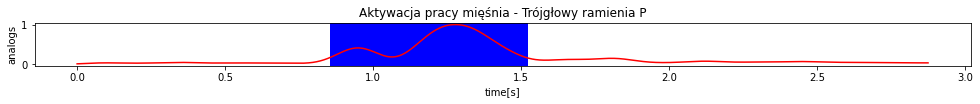

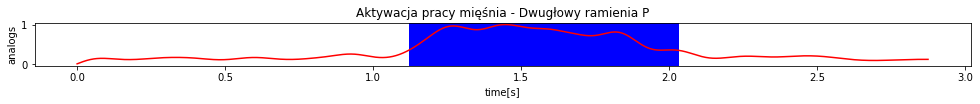

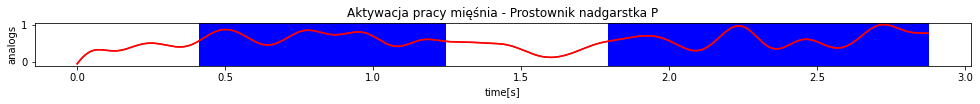

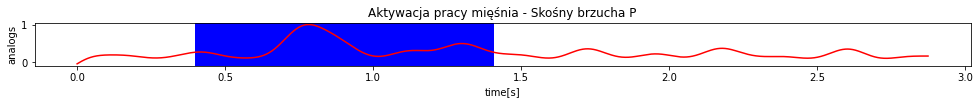

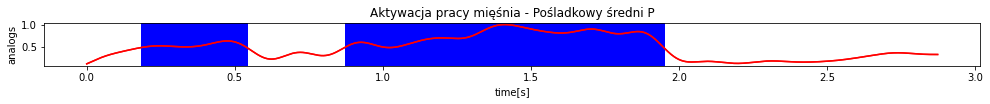

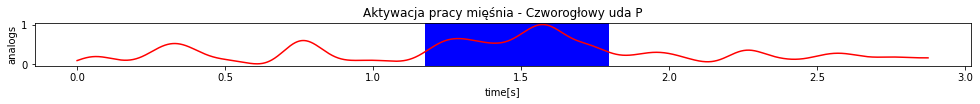

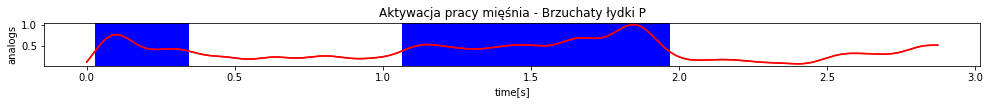

In [8]:
onset_offset_muscles(data_path)

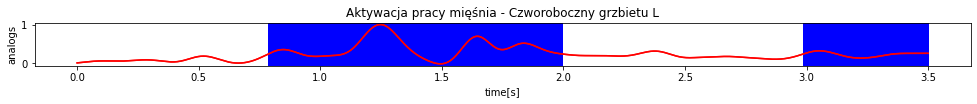

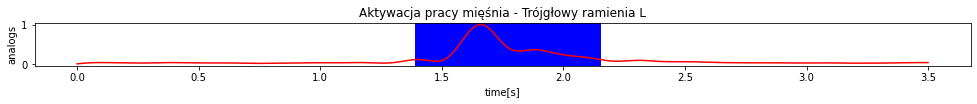

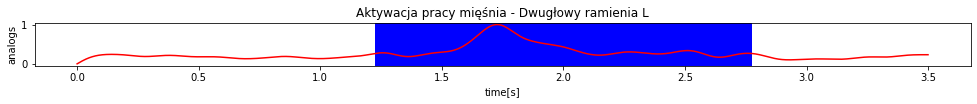

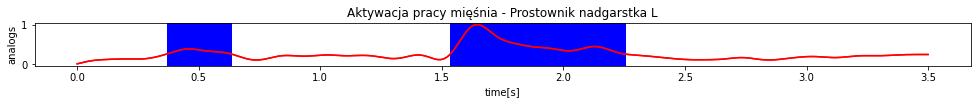

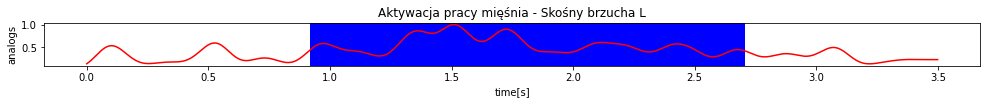

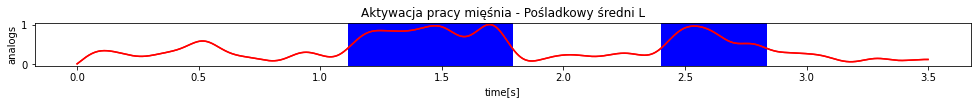

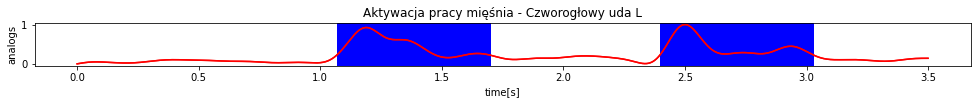

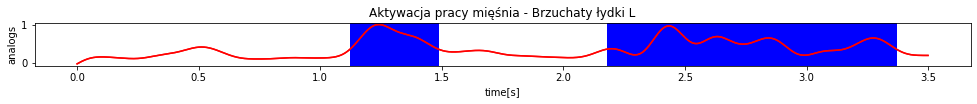

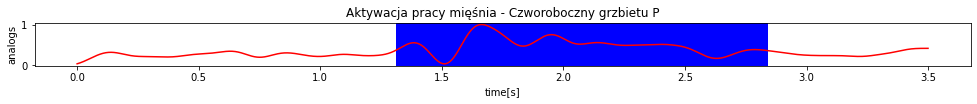

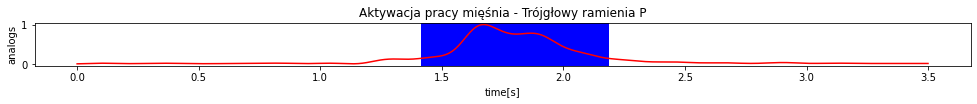

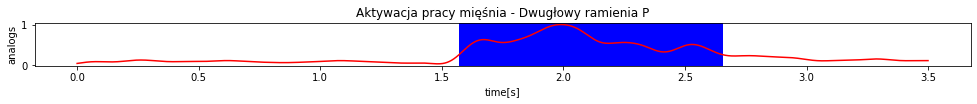

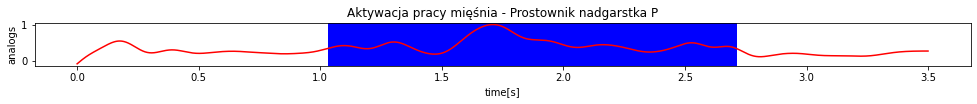

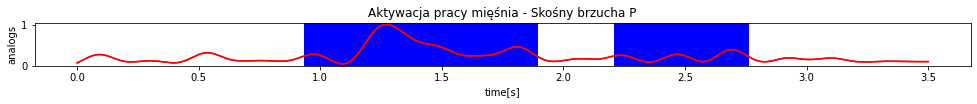

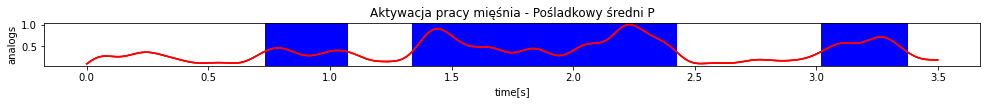

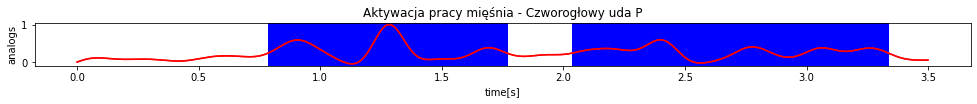

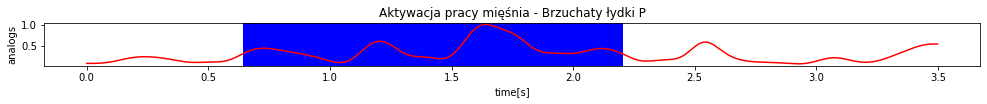

In [9]:
data_path2=r"Z:\baza\2020-08-06-B0445-S01-E01-T01-K01.c3d"
onset_offset_muscles(data_path2)

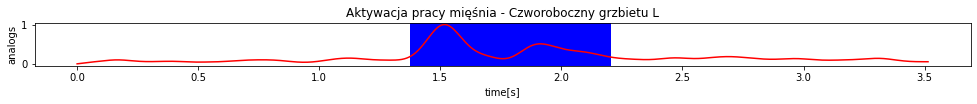

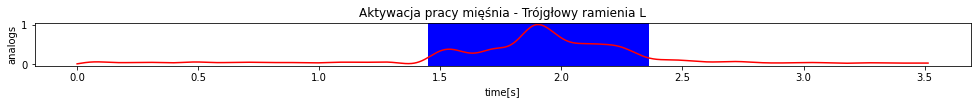

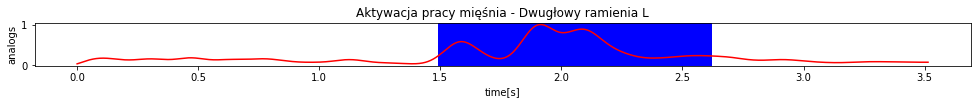

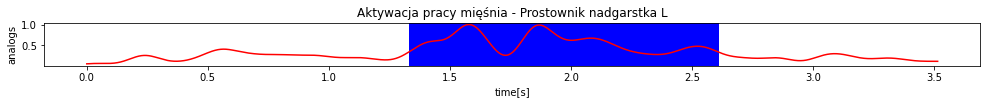

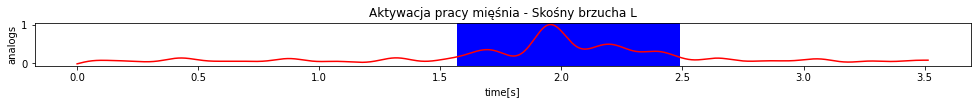

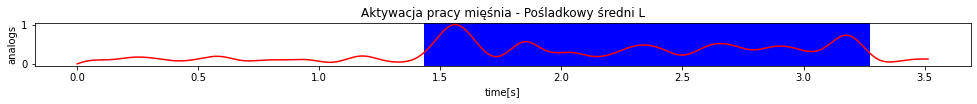

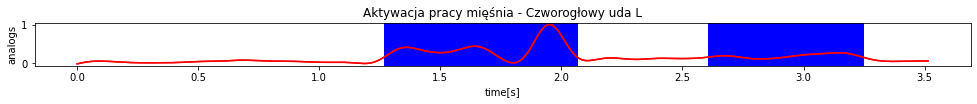

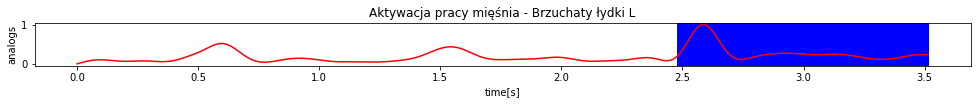

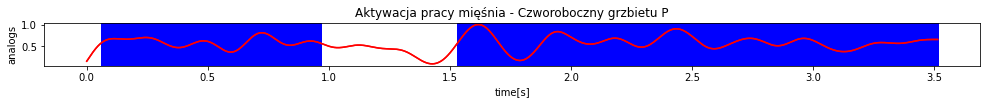

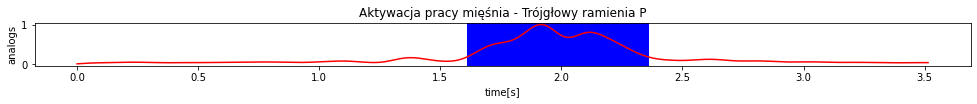

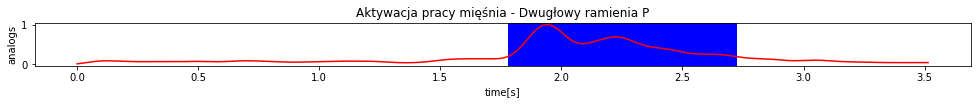

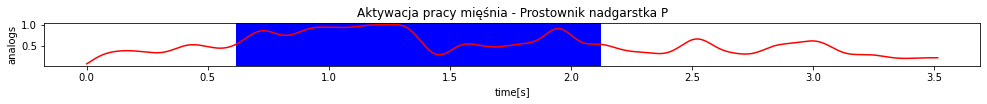

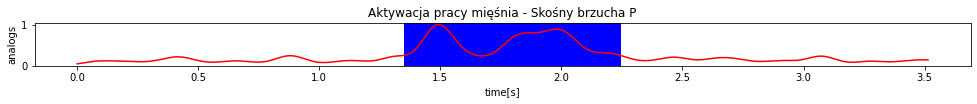

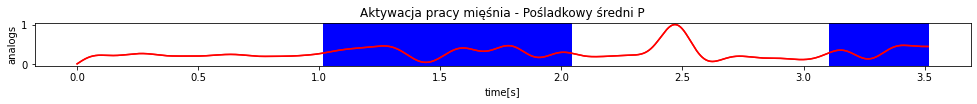

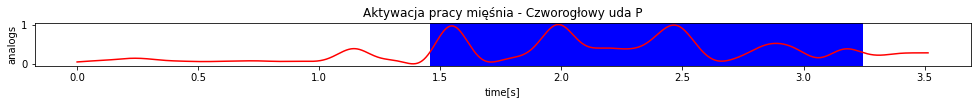

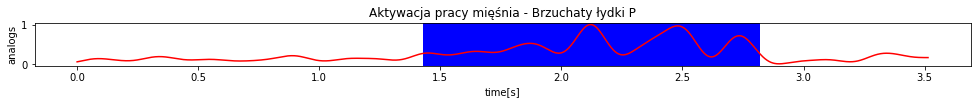

In [10]:
data_path3=r"Z:\baza\2020-08-06-B0445-S01-E03-T01-K01.c3d"
onset_offset_muscles(data_path3)

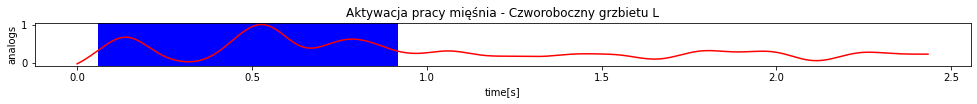

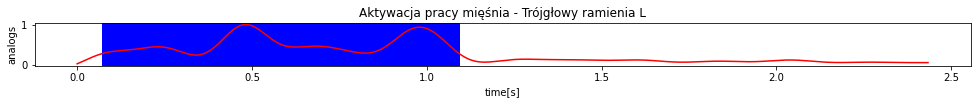

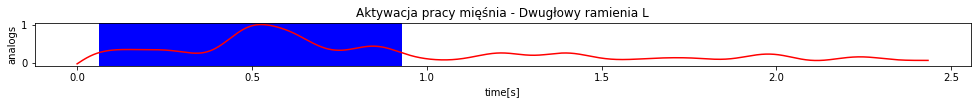

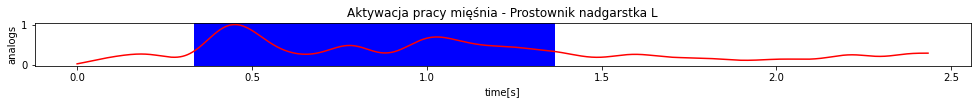

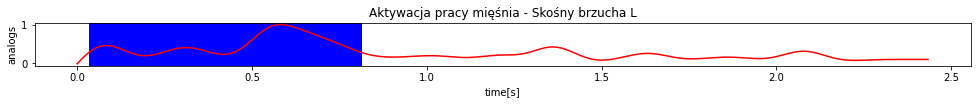

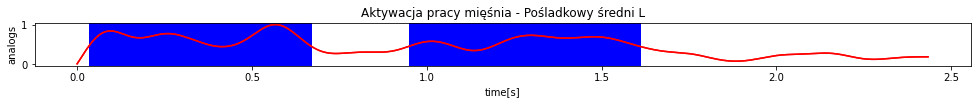

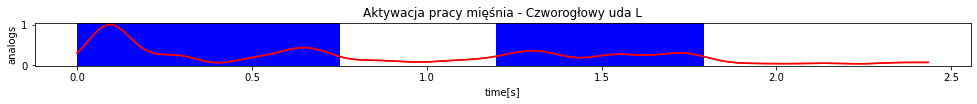

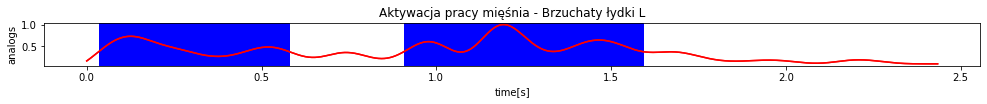

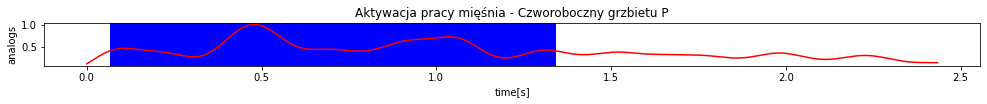

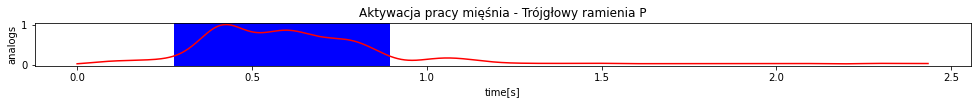

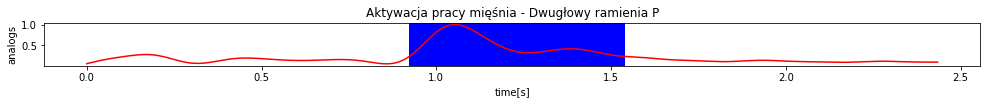

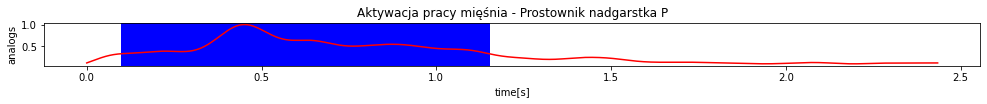

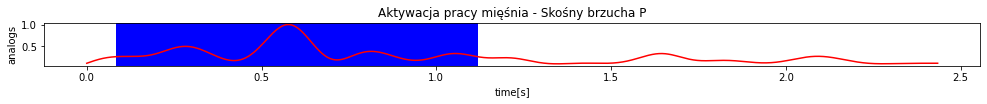

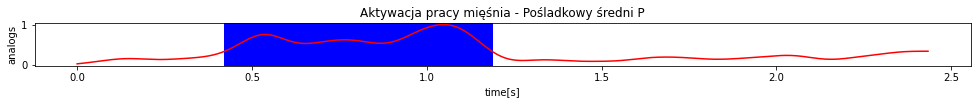

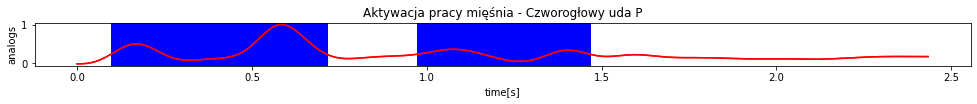

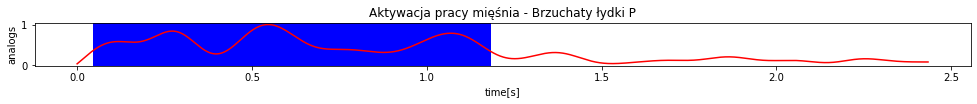

In [11]:
data_path4=r"Z:\baza\2020-08-06-B0445-S01-E04-T01-K01.c3d"
onset_offset_muscles(data_path4)

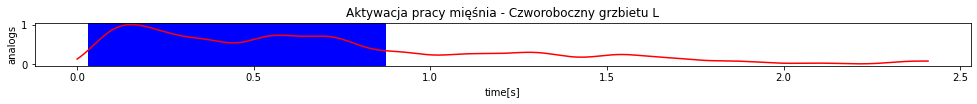

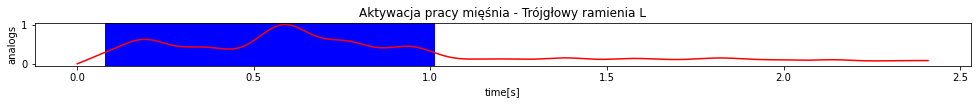

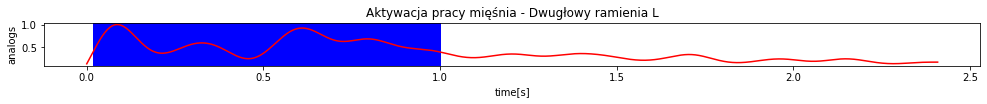

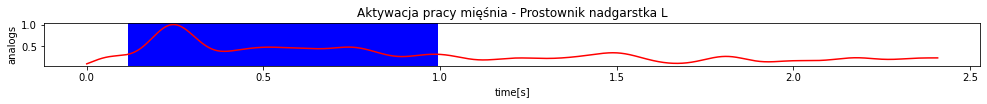

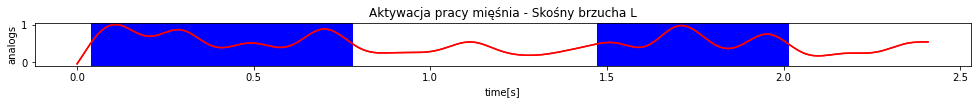

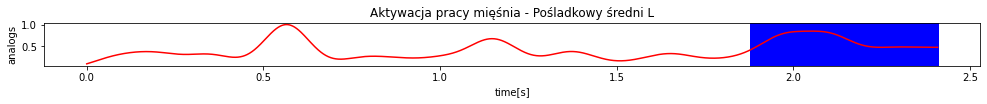

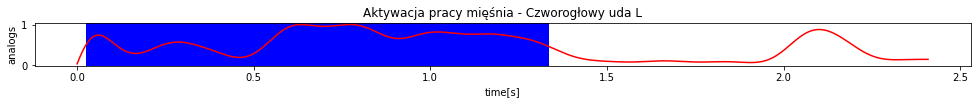

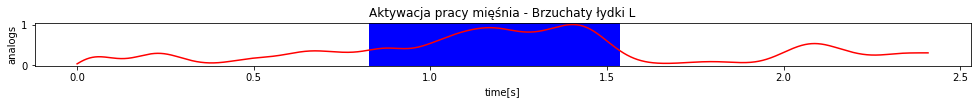

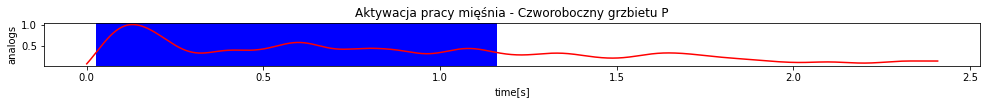

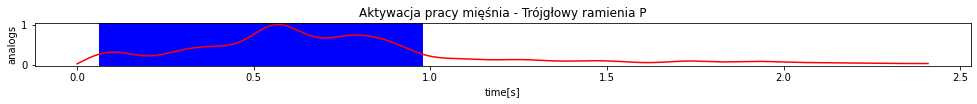

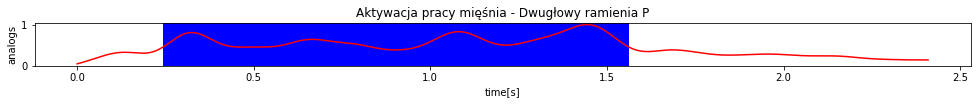

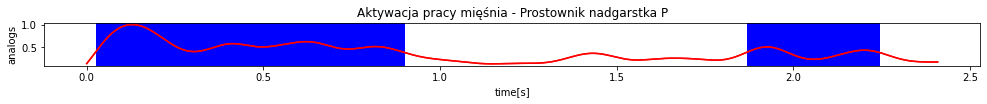

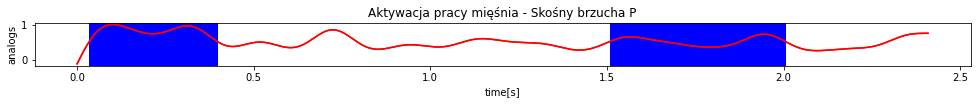

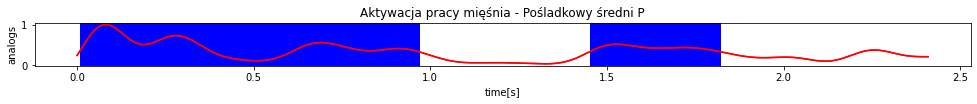

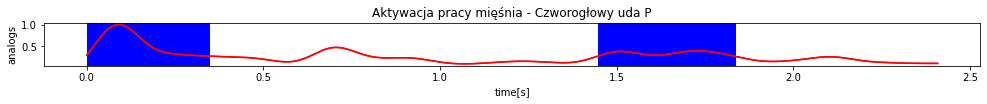

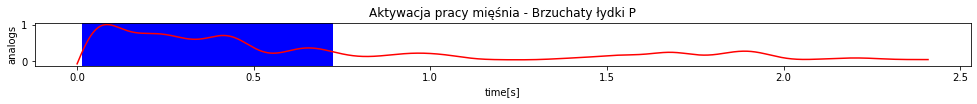

In [12]:
data_path5=r"Z:\baza\2020-08-06-B0445-S01-E05-T01-K01.c3d"
onset_offset_muscles(data_path5)

# Określenie ocinków i podfaz

In [13]:
data_path3=r"Z:\baza\2020-08-05-B0444-S01-E02-T01-K03.c3d"
data_path4=r"Z:\baza\2020-08-05-B0444-S01-E03-T05-K06.c3d"

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import sys
from pyomeca import Analogs

import dataprocesing as dp

freq=1000
muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
def onset_offset_muscles_z_przesunieciem(data_path):
 
    #emgs= dp.normalize_emg(analogs)
    
    emg=Analogs.from_c3d(data_path, usecols=muscles)
    emg=dp.normalize_emg(emg)
    
    emg.plot(x="time", col="channel", col_wrap=3)
    
    plt.show()
    #emg=dp.nowy_czas_analog()
    emg = dp.emg_full_preproces(data_path)
    #emg=emg.meca.time_normalize(n_frames=1000)
    #emg[9].plot()
    #plt.show()
    
    for i in range(16):
        
        #print(len(emg[i]))
        #emg[i].plot(x="time", col="channel", col_wrap=3)
        
        s,k=dp.nowy_czas_analog([1], [len(emg[i])], emg[i])
    
        onsets =  emg[i].meca.detect_onset(   #.sel(channel=["Voltage.1"]
        threshold= emg[i].mean(),   # mean of the signal 
            
        #threshold2= emg[i].std(),
            
        n_above=freq / 4,                     # we want at least 1/2 second above the threshold
        n_below=freq / 4,                     # we accept point below threshold for 1/2 second
        )  
        emg_std=emg[i].std()          # odchylenie standardowe
        emg_mean=emg[i].mean()        # średnia
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=5, 
                        top=0.25, 
                        wspace=0.25, 
                        hspace=0.35)
        
        for (start, end) in onsets:
            
            #plt.axvline(x=start/1000, color="g") #dzielimy przez 1000 (tyle odczytujemy klatek na sec), aby była ta sama skala (przejście z klatek na sekundy)
            #plt.axvline(x=end/1000, color="r")
            
            plt.axvspan(start/1000, end/1000, color="b")
            
            #print(k[0].astype(int))
            
            emg[i][s[0].astype(int):k[0].astype(int)].plot(color="r") # zmiana typu zmiennej k na int
            
            #emg_std.plot()
            
        #print(emg_std.values[0])
        #print(emg_std)
        #print(emg_mean)
        #print(emg_std-emg_mean)
        
        #print(threshold)    
    
        plt.title("Aktywacja pracy mięśnia - "+muscles_names[i])
        plt.xlabel("time[s]")
        plt.ylabel("analogs")
        plt.show()
        
        #print(s,k)

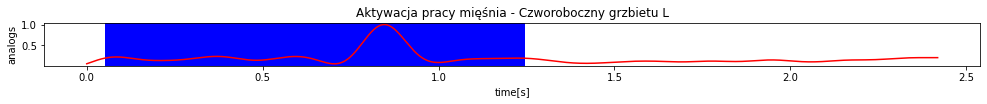

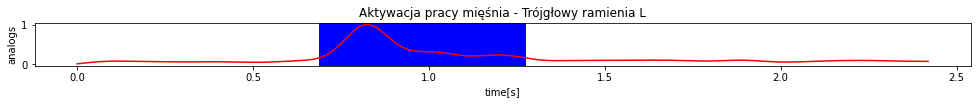

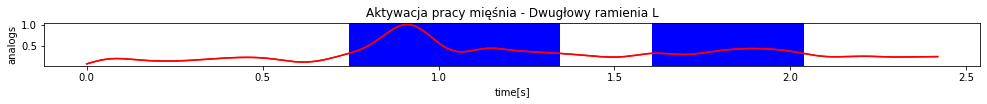

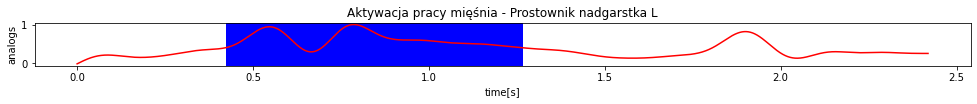

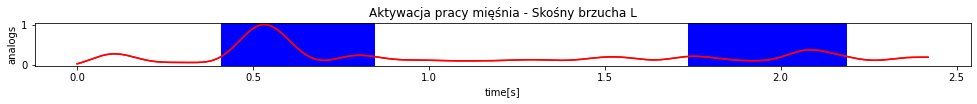

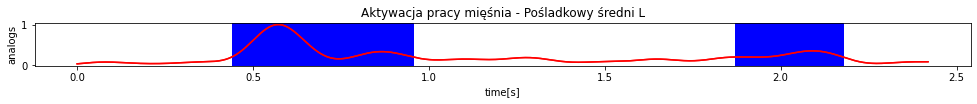

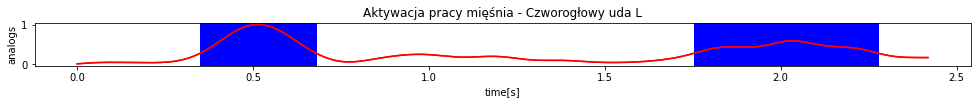

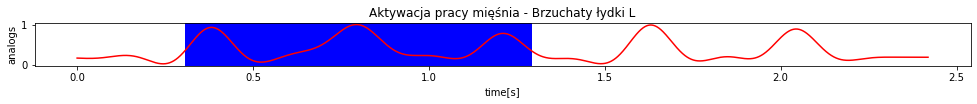

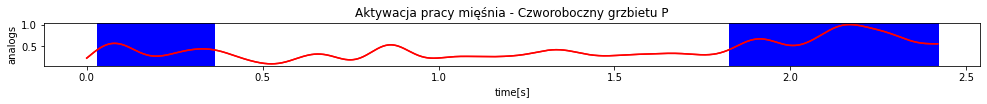

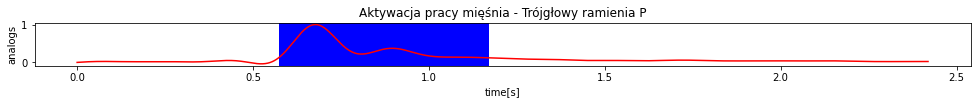

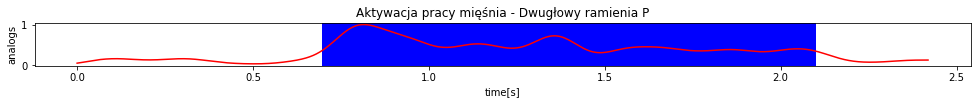

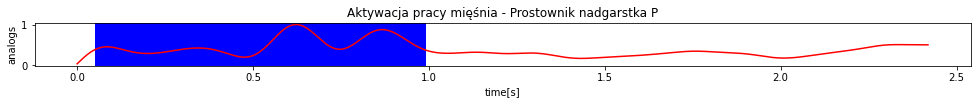

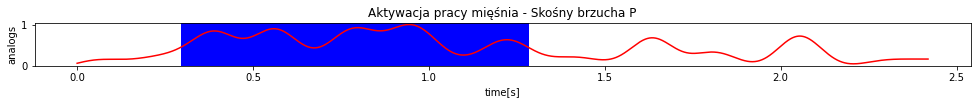

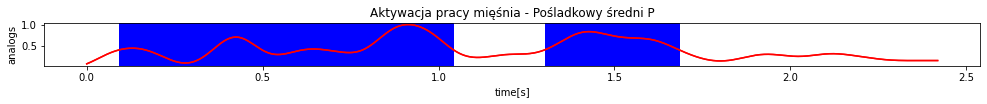

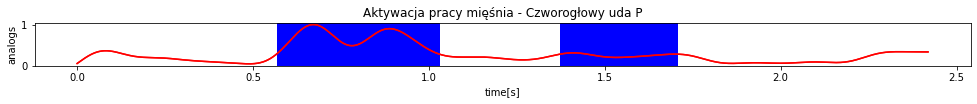

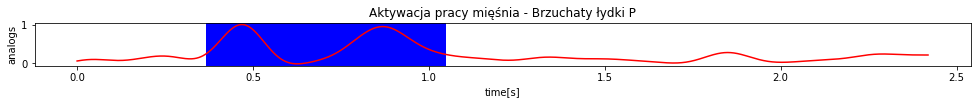

In [15]:
data_path3=r"Z:\baza\2020-08-05-B0444-S01-E02-T01-K03.c3d"
onset_offset_muscles(data_path3)

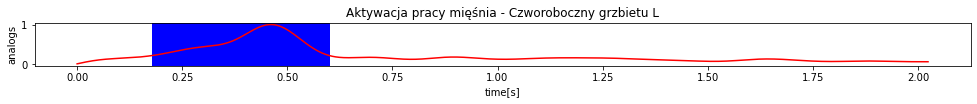

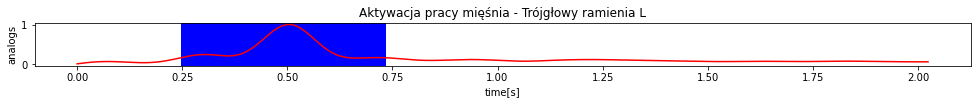

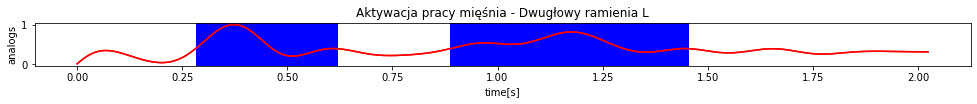

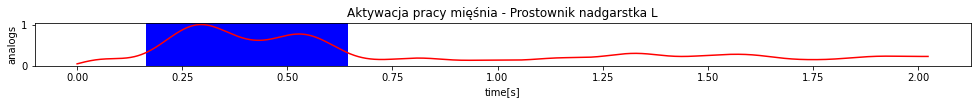

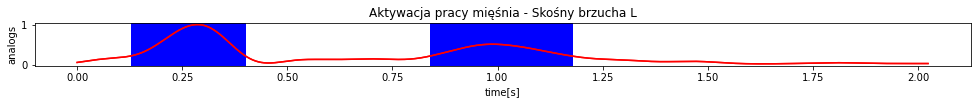

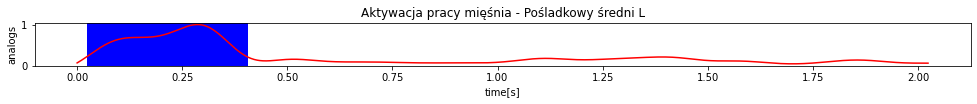

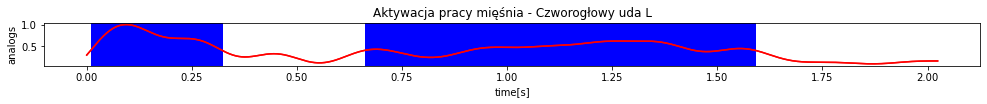

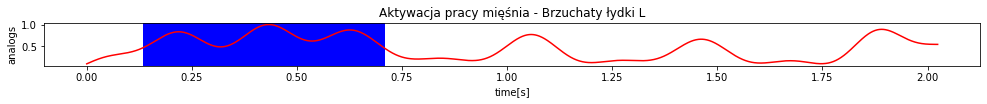

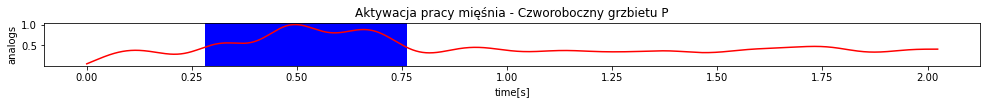

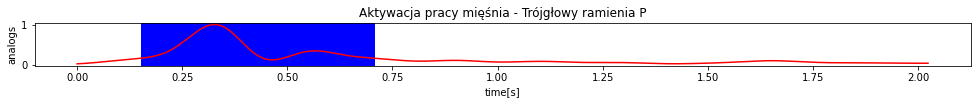

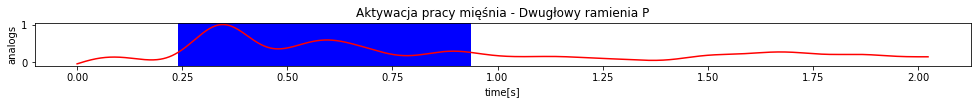

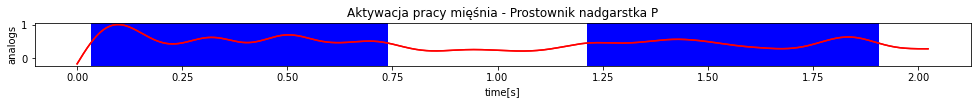

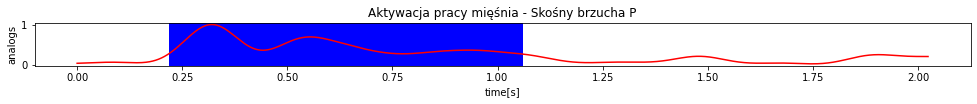

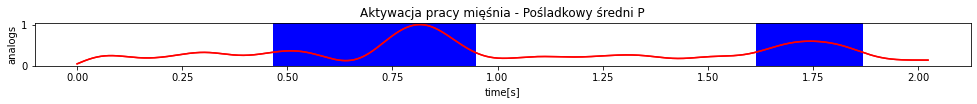

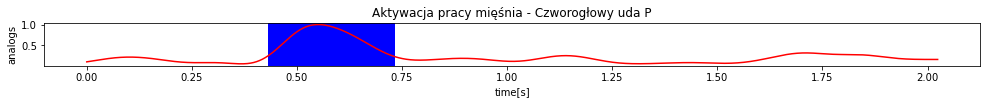

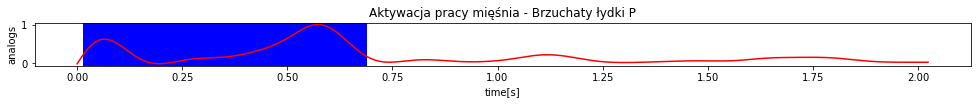

In [16]:
data_path4=r"Z:\baza\2020-08-05-B0444-S01-E03-T05-K06.c3d"
onset_offset_muscles(data_path4)

## Porównanie aktywacji mięśnia z przesunięciem fazy do bez przesuniecia

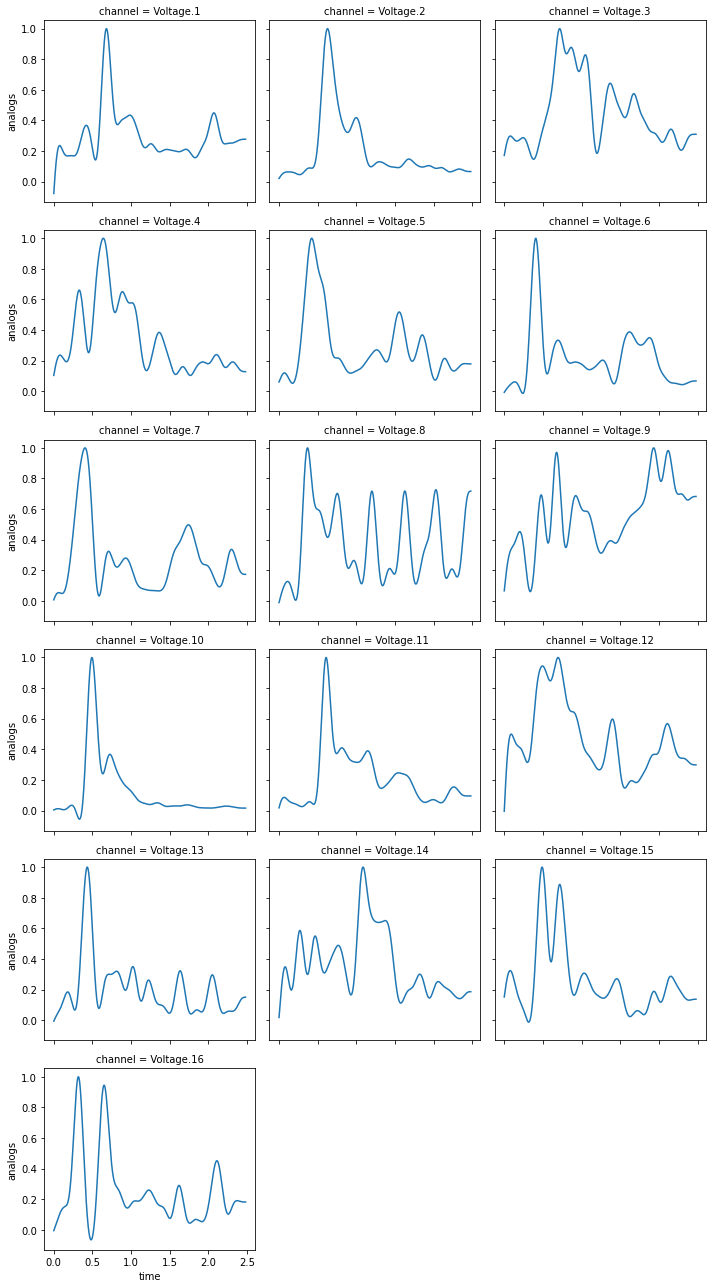

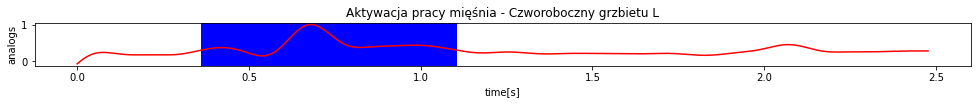

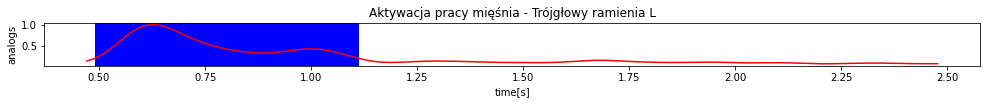

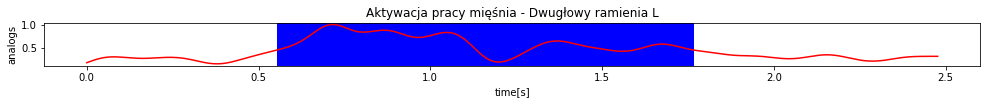

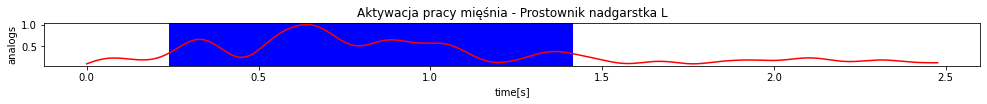

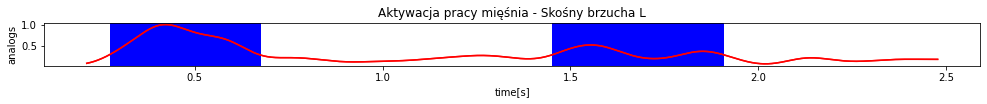

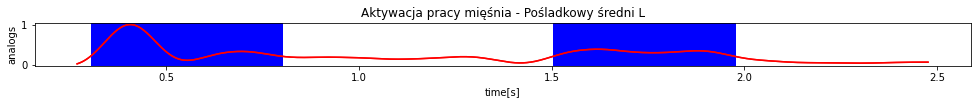

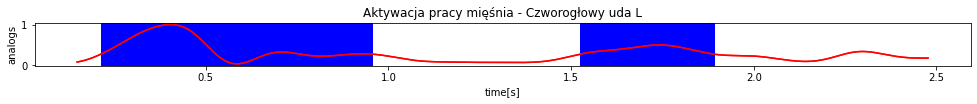

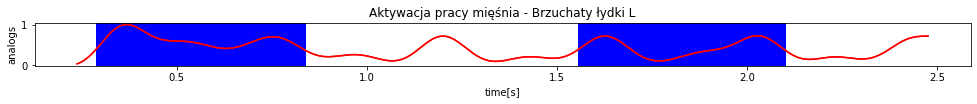

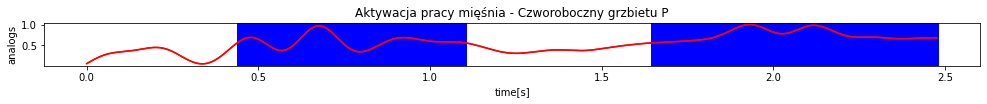

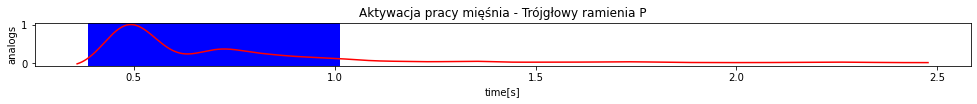

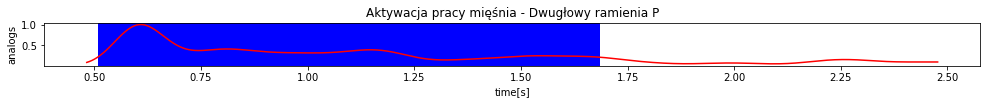

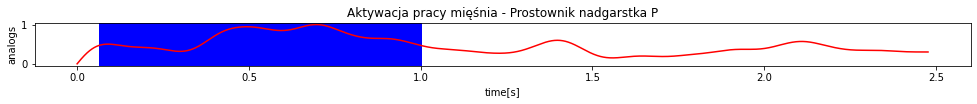

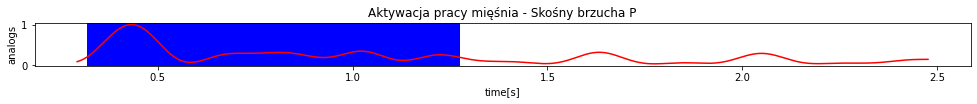

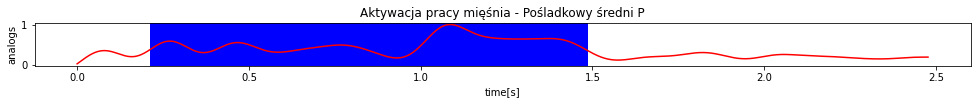

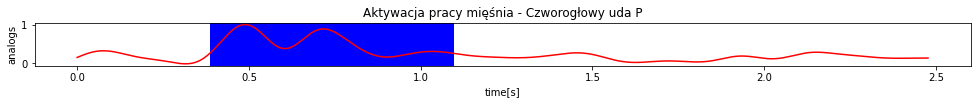

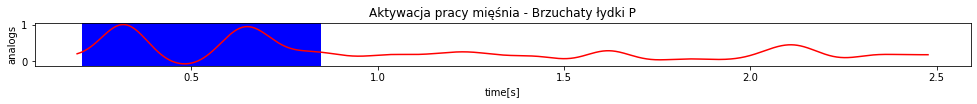

In [17]:
data_path=r"Z:\baza\2020-08-05-B0444-S01-E02-T01-K02.c3d"
onset_offset_muscles_z_przesunieciem(data_path)

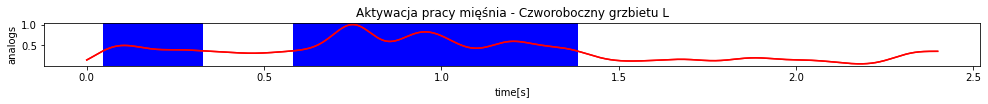

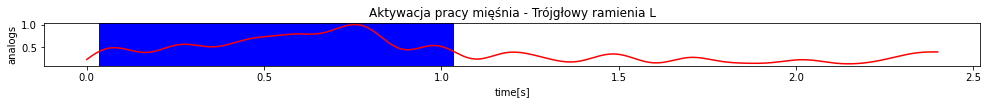

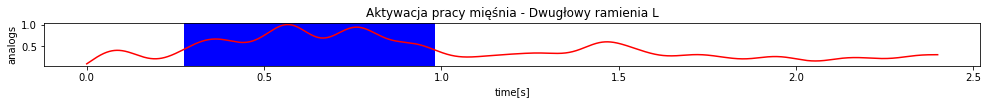

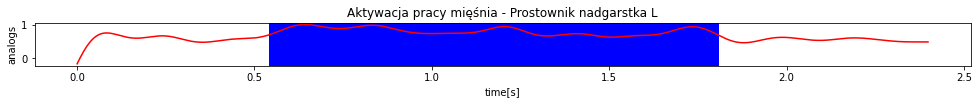

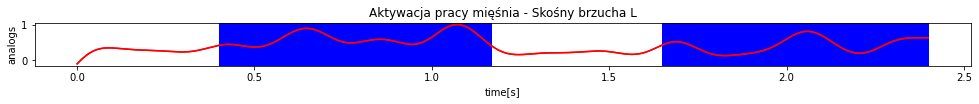

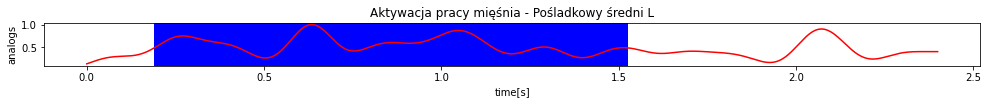

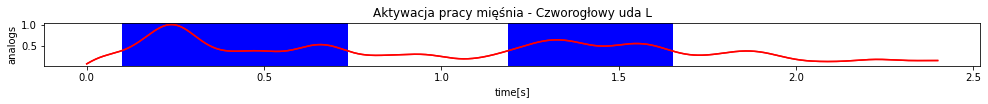

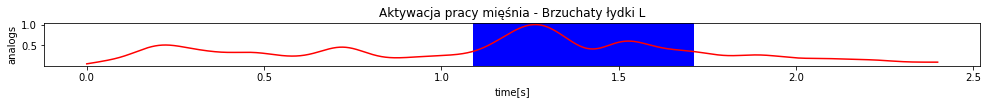

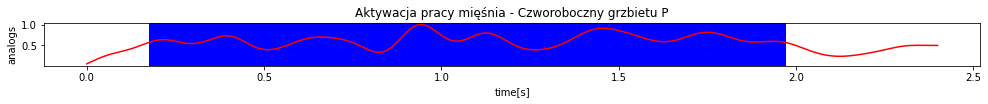

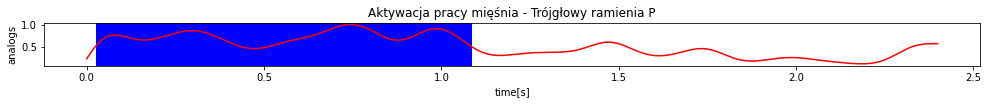

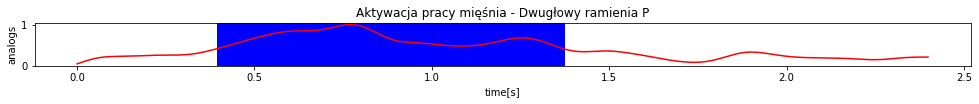

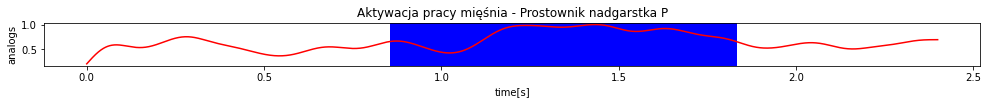

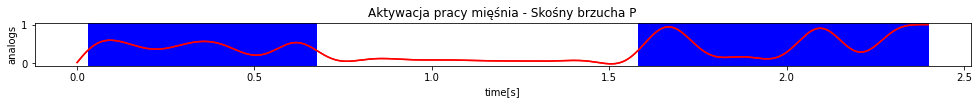

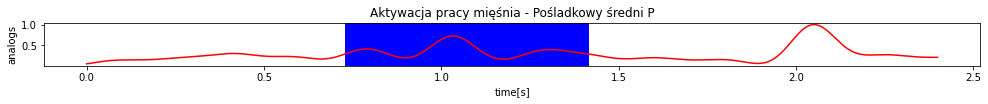

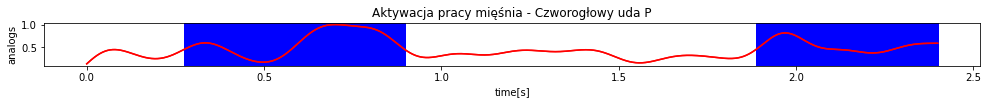

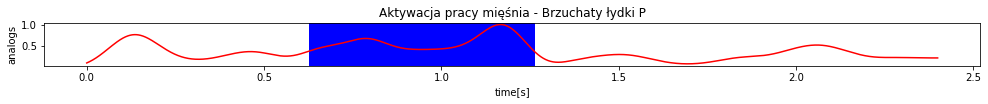

In [18]:
data_path=r"Z:\baza\2020-08-12-B0452-S01-E03-T01-K03.c3d"
onset_offset_muscles(data_path)

## Dla danego ćwiczenia 1 osoby z wszystkich powtórzeń

In [19]:
help(dp.compare_events_average_shifted)

Help on function compare_events_average_shifted in module dataprocesing:

compare_events_average_shifted(folder_path, person, exer_num)
    Funkcja wyświetlająca uśrednioną prace mięsni dla danego świczenia i aktora z przesunięciem ruchów w fazie.
    
    Input:
    - folder_path - ścieżka dostępu do folderu z wszystkimi nagraniami
    - person - Nazwa aktora do wczytania
    - exer_num - Nazwa ćwiczenia do wczytania
    
    Output:
    - Wykresy średnich przebiegów dla danego ćwiczenia z przesunięciem ruchów w fazie



In [20]:
def compare_offset_onset_muscles(folder_path, person, exer_num):
    
    muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    cons1="\*\*-E0"
    cons2="-*.c3d"
    path=folder_path+person+cons1+exer_num+cons2
     
    aver_arr_all=np.zeros((16,1000))     
    
    for file in glob.glob(path,recursive = True):
        print(file)
        emg_processed=dp.emg_full_preproces(file)
        
        aver_arr=np.zeros((16,1000))  
        file_num=0

        p,d=dp.read_labels(file, 1000)
        ev=[p,d]
        for num in range(16):
            
            s,k=dp.nowy_czas_analog(p,d,emg_processed[num])
            
            
            
            for i in range(len(p)):               
                emg_processed_event=emg_processed[num][(p[i]+s[i].astype(int)):(d[i]+k[i].astype(int))]
                emg_processed_event2 = (
                emg_processed_event.meca.normalize(scale=1)                
         )                                           
                time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)                
    
                for t in range(1000):
                    aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]

            onsets =  time_normalized.meca.detect_onset(   #.sel(channel=["Voltage.1"]
            threshold= time_normalized.mean(),   # mean of the signal
                
            n_above=freq / 4,
            n_below=freq / 4,
            )
        
            for (start, end) in onsets:
                plt.axvspan(start/1000, end/1000, color="b")
                
                
            aver_arr[num]=aver_arr[num]/10
            time=np.linspace(1,1000,1000)

            for t2 in range(1000):
                aver_arr_all[file_num][t2]=aver_arr_all[file_num][t2]+time_normalized.values[t2]
            file_num=file_num+1;
            
    for num in range(16):
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=5, 
                    top=1, 
                    wspace=0.25, 
                    hspace=0.35)
        
        onsets =  emg_processed[num].meca.detect_onset(   #.sel(channel=["Voltage.1"]
            threshold= emg_processed[num].mean(),   # mean of the signal
                
            n_above=freq / 4,
            n_below=freq / 4,
            )
        
        
        aver_arr_all[num]=aver_arr_all[num]/6
        
        plt.plot(time,aver_arr_all[num])     
        plt.title(muscles_names[num])
        plt.show()

Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E01-T01.c3d
Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E01-T02.c3d
Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E01-T03.c3d
Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E01-T04.c3d
Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E01-T05.c3d
Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E01-T06.c3d


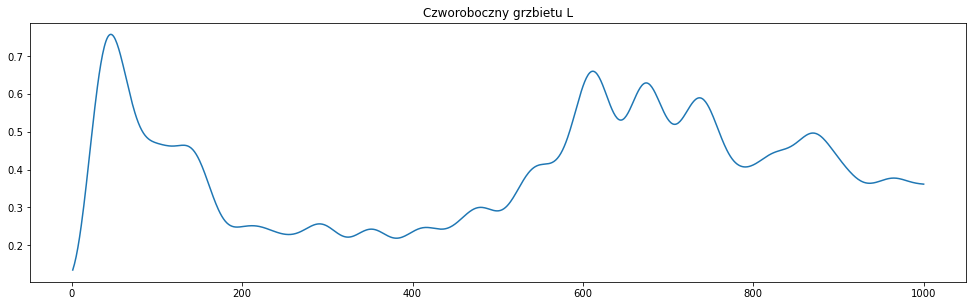

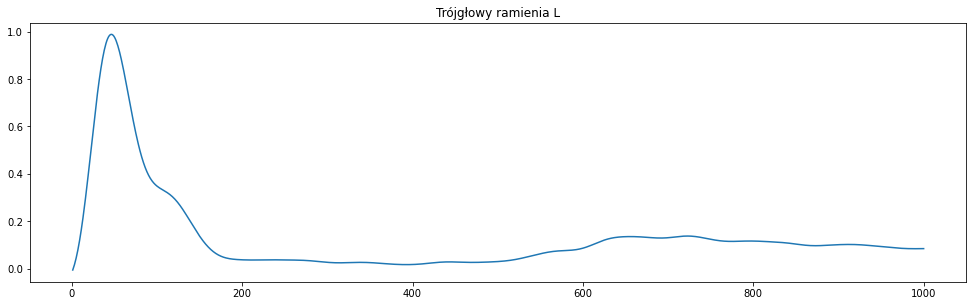

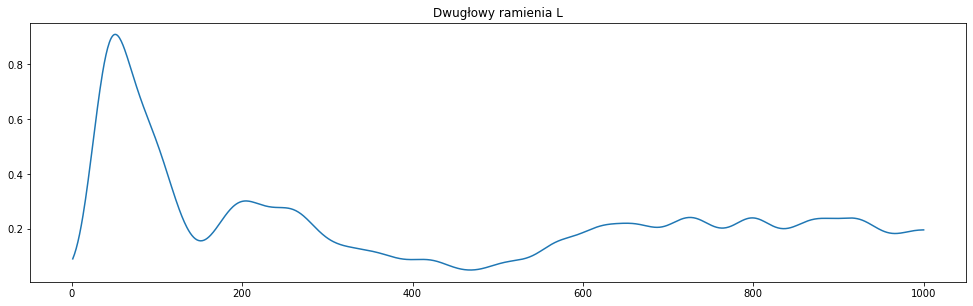

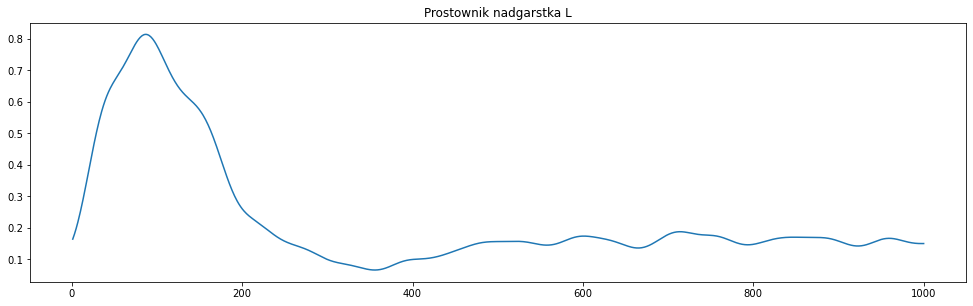

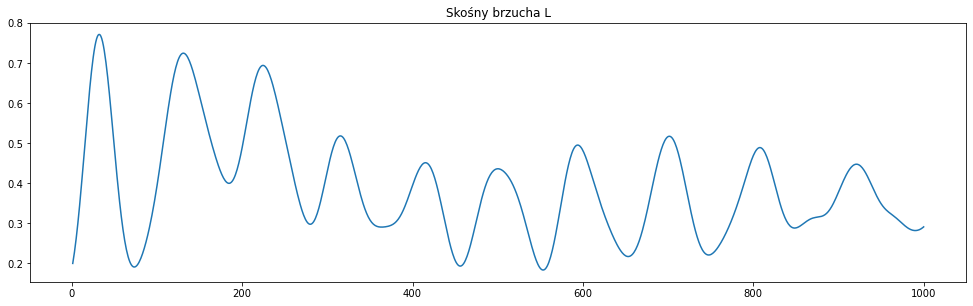

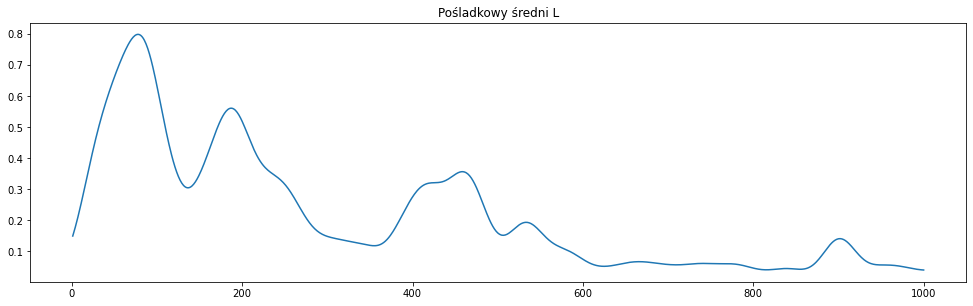

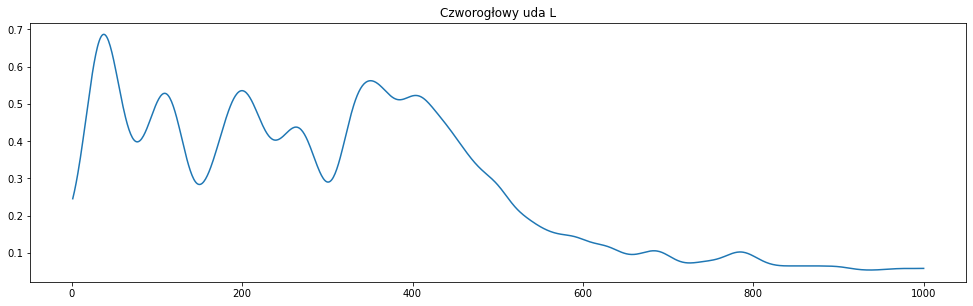

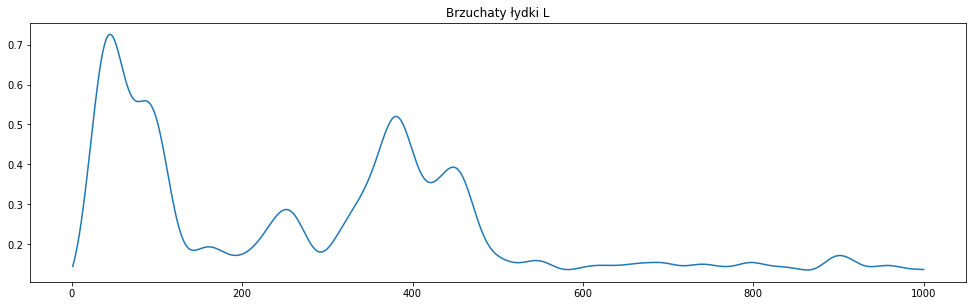

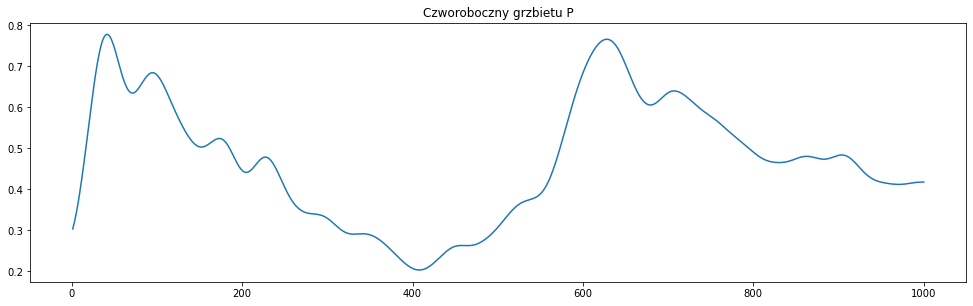

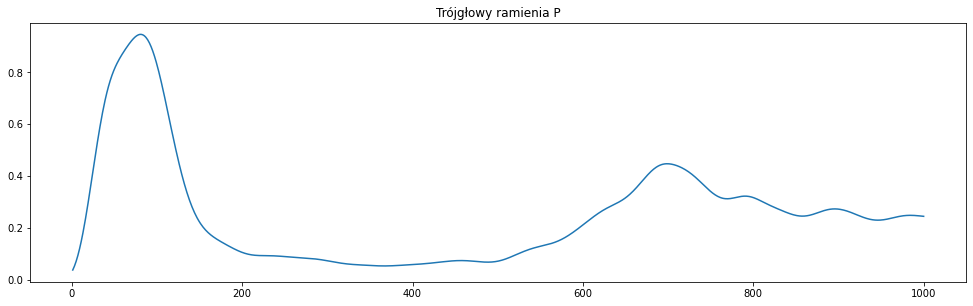

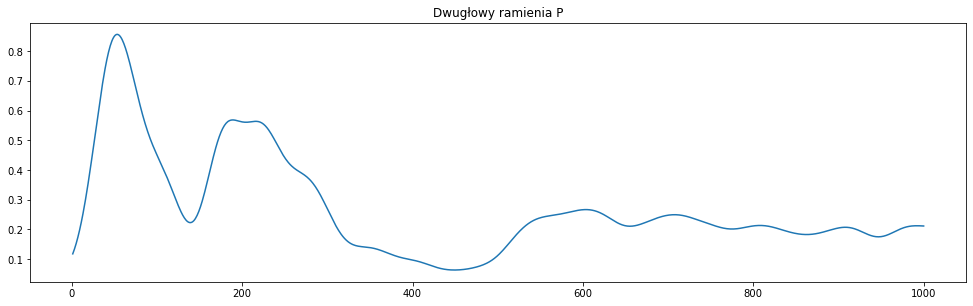

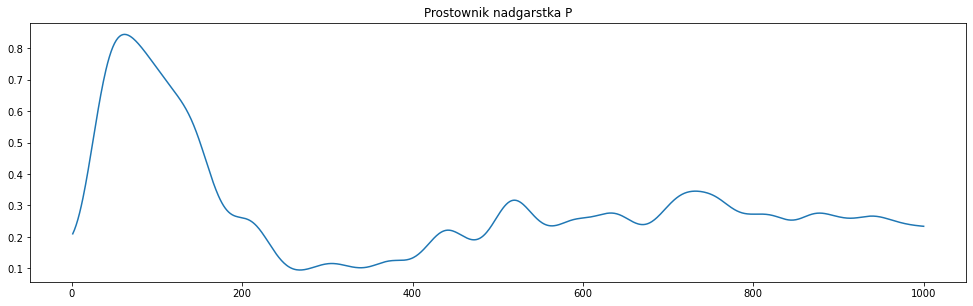

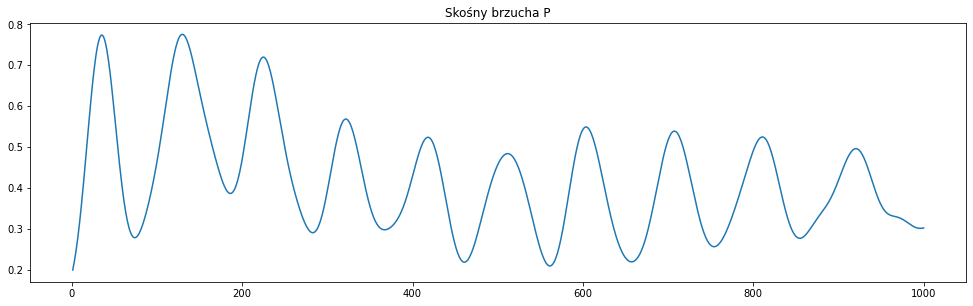

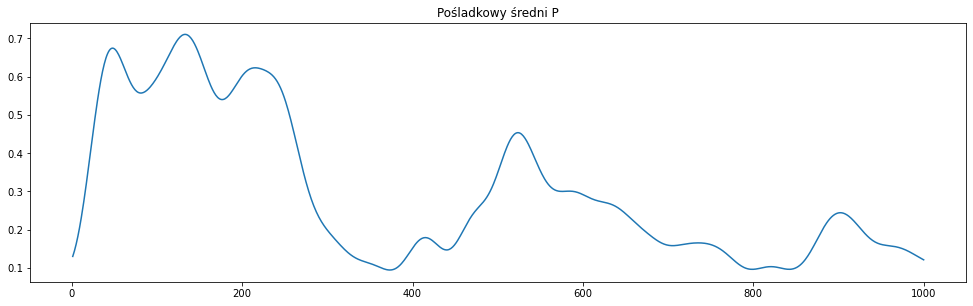

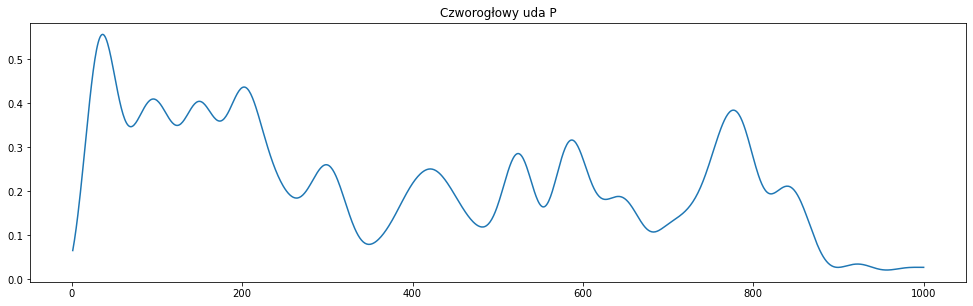

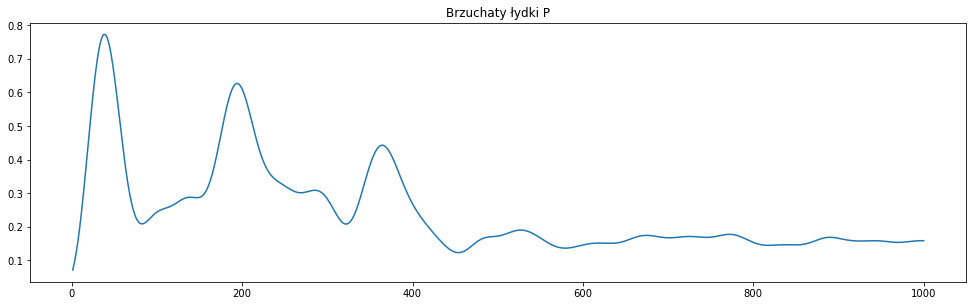

In [21]:
folder_path=r"Z:\Miecz\\"
compare_offset_onset_muscles(folder_path,"B0446","1")

In [22]:
def compare_offset_onset_muscles(folder_path, person, exer_num):
    
    muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    cons1="\*\*-E0"
    cons2="-*.c3d"
    path=folder_path+person+cons1+exer_num+cons2
     
    aver_arr_all=np.zeros((16,1000))     
    onsets=[[]]
    for file in glob.glob(path,recursive = True):
        onsets.append([])
        
        #print("append")
        #print(file)
        
        emg_processed=dp.emg_full_preproces(file)
        
        aver_arr=np.zeros((16,1000))  
        file_num=0

        p,d=dp.read_labels(file, 1000)
       
        for num in range(16):
            
            s,k=dp.nowy_czas_analog(p,d,emg_processed[num])
            
            
            
            for i in range(len(p)):               
                emg_processed_event=emg_processed[num][(p[i]+s[i].astype(int)):(d[i]+k[i].astype(int))]
                emg_processed_event2 = (
                emg_processed_event.meca.normalize(scale=1)                
         )                                           
                time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)                
    
                for t in range(1000):
                    aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]
            #print(file_num)
            onsets[file_num].append(time_normalized.meca.detect_onset(   #.sel(channel=["Voltage.1"]
            threshold= time_normalized.mean(),   # mean of the signal
                
            n_above=freq / 4,
            n_below=freq / 4,
            ))
                
            aver_arr[num]=aver_arr[num]/10
            time=np.linspace(1,1000,1000)
        

            for t2 in range(1000):
                aver_arr_all[file_num][t2]=aver_arr_all[file_num][t2]+time_normalized.values[t2]
        file_num=file_num+1;
    
    
    for num in range(16):
        onsets2[num]=np.mean(onsets[num])/5
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=5, 
                    top=1, 
                    wspace=0.25, 
                    hspace=0.35)
        
        for (start, end) in onsets2[num]:
                plt.axvspan(start, end, color="b")
        
        aver_arr_all[num]=aver_arr_all[num]/6
        
        #plt.axvspan(start, end, color="b")
        plt.plot(time,aver_arr_all[num])     
        plt.title(muscles_names[num])
        plt.show()

In [23]:
folder_path=r"Z:\Miecz\\"
compare_offset_onset_muscles(folder_path,"B0446","1")

ValueError: operands could not be broadcast together with shapes (1,2) (0,) 

In [ ]:
np.mean(onsets[1])/5

In [ ]:
def compare_events_average_shifted(folder_path, person, exer_num):
    
    muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    cons1="\*\*-E0"
    cons2="-*.c3d"
    path=folder_path+person+cons1+exer_num+cons2
     
    aver_arr_all=np.zeros((16,1000))     # średnia danych dla 16 mięśni (każdy plik zawiera 1000 jednostek czasu) 
    
    for file in glob.glob(path,recursive = True):
        
        print(file)
        emg_processed=dp.emg_full_preproces(file) 
        
                
        aver_arr=np.zeros((16,1000))  #tabela średnich dla każdego mięśnia dla pojedyńczego pliku
        file_num=0

        p,d=dp.read_labels(file, 1000)  # czytnie eventów (początlki i końce eventów)
        
        for num in range(16):  # dla kazdego miesnia w tym pliku
            s,k=dp.nowy_czas_analog(p,d,emg_processed[num]) #nowy poczatek i koniec po przesunieciu
          
            for i in range(len(p)):     #dla każdego eventu robiona jest normalizacja        
                emg_processed_event=emg_processed[num][(p[i]+s[i].astype(int)):(d[i]+k[i].astype(int))]
                emg_processed_event2 = (
                emg_processed_event.meca.normalize(scale=1)                
         )                                           
                time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)                
    
                for t in range(1000):   #liczenie średniej
                    aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]

            aver_arr[num]=aver_arr[num]/10
            time=np.linspace(1,1000,1000)

            for t2 in range(1000):  #średnia dla wszytskich plików
                aver_arr_all[file_num][t2]=aver_arr_all[file_num][t2]+time_normalized.values[t2] # tablica zawiera wartości srednie dla wsytzkich plikow
            file_num=file_num+1;
            
    for num in range(16):
        subplot(1, 1, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.7, 
                    wspace=0.25, 
                    hspace=0.35)
        aver_arr_all[num]=aver_arr_all[num]/5
        plt.plot(time,aver_arr_all[num])     
        plt.title(muscles_names[num])
        plt.show()

In [ ]:
folder_path=r"Z:\Miecz\\"
compare_events_average_shifted(folder_path,"B0446","1")